In [1]:
from collections import defaultdict

In [2]:
f = open('day17_input.txt')
lines = f.readlines()
f.close()

In [3]:
data_raw = [(line[0:-1]) for line in lines]
print(data_raw)

['####...#', '......##', '####..##', '##......', '..##.##.', '#.##...#', '....##.#', '.##.#.#.']


In [4]:
data_raw

['####...#',
 '......##',
 '####..##',
 '##......',
 '..##.##.',
 '#.##...#',
 '....##.#',
 '.##.#.#.']

In [5]:
data1 = ['.#.',
'..#',
'###']

In [6]:
cube = defaultdict(lambda:0)
data = data_raw
N = len(data)
for x in range(N):
    for y in range(N):
        key = f'{x-int(N/2+0.1)},{y-int(N/2+0.1)},0'
#         print(key)
        if data[x][y] == '#':
            cube[key] = 1
print(cube)

defaultdict(<function <lambda> at 0x0000020376EB7E50>, {'-4,-4,0': 1, '-4,-3,0': 1, '-4,-2,0': 1, '-4,-1,0': 1, '-4,3,0': 1, '-3,2,0': 1, '-3,3,0': 1, '-2,-4,0': 1, '-2,-3,0': 1, '-2,-2,0': 1, '-2,-1,0': 1, '-2,2,0': 1, '-2,3,0': 1, '-1,-4,0': 1, '-1,-3,0': 1, '0,-2,0': 1, '0,-1,0': 1, '0,1,0': 1, '0,2,0': 1, '1,-4,0': 1, '1,-2,0': 1, '1,-1,0': 1, '1,3,0': 1, '2,0,0': 1, '2,1,0': 1, '2,3,0': 1, '3,-3,0': 1, '3,-2,0': 1, '3,0,0': 1, '3,2,0': 1})


In [7]:
cube0 = dict(cube)

In [8]:
cube0

{'-4,-4,0': 1,
 '-4,-3,0': 1,
 '-4,-2,0': 1,
 '-4,-1,0': 1,
 '-4,3,0': 1,
 '-3,2,0': 1,
 '-3,3,0': 1,
 '-2,-4,0': 1,
 '-2,-3,0': 1,
 '-2,-2,0': 1,
 '-2,-1,0': 1,
 '-2,2,0': 1,
 '-2,3,0': 1,
 '-1,-4,0': 1,
 '-1,-3,0': 1,
 '0,-2,0': 1,
 '0,-1,0': 1,
 '0,1,0': 1,
 '0,2,0': 1,
 '1,-4,0': 1,
 '1,-2,0': 1,
 '1,-1,0': 1,
 '1,3,0': 1,
 '2,0,0': 1,
 '2,1,0': 1,
 '2,3,0': 1,
 '3,-3,0': 1,
 '3,-2,0': 1,
 '3,0,0': 1,
 '3,2,0': 1}

In [9]:
def count26(xyz: str, cube) -> int:
    x, y, z = xyz.split(',')
    x, y, z = int(x), int(y), int(z)
    ct = 0
    neighbors = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            for k in [-1, 0, 1]:
                if (i == 0) and (j == 0) and (k == 0):
                    continue
                neighbors.append(f'{x+i},{y+j},{z+k}')
    for key in neighbors:
        if key in cube:
            ct += cube[key]
    return ct

In [10]:
data

['####...#',
 '......##',
 '####..##',
 '##......',
 '..##.##.',
 '#.##...#',
 '....##.#',
 '.##.#.#.']

In [11]:
cycle_n = 1
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0

In [12]:
new_cube

{'-4,-4,0': 0,
 '-4,-3,0': 1,
 '-4,-2,0': 1,
 '-4,-1,0': 0,
 '-4,3,0': 1,
 '-3,2,0': 0,
 '-3,3,0': 0,
 '-2,-4,0': 1,
 '-2,-3,0': 0,
 '-2,-2,0': 1,
 '-2,-1,0': 0,
 '-2,2,0': 1,
 '-2,3,0': 1,
 '-1,-4,0': 1,
 '-1,-3,0': 0,
 '0,-2,0': 0,
 '0,-1,0': 1,
 '0,1,0': 0,
 '0,2,0': 1,
 '1,-4,0': 0,
 '1,-2,0': 1,
 '1,-1,0': 0,
 '1,3,0': 1,
 '2,0,0': 1,
 '2,1,0': 1,
 '2,3,0': 1,
 '3,-3,0': 0,
 '3,-2,0': 0,
 '3,0,0': 1,
 '3,2,0': 1,
 '-5,-5,-1': 0,
 '-5,-5,0': 0,
 '-5,-5,1': 0,
 '-5,-4,-1': 0,
 '-5,-4,0': 0,
 '-5,-4,1': 0,
 '-5,-3,-1': 1,
 '-5,-3,0': 1,
 '-5,-3,1': 1,
 '-5,-2,-1': 1,
 '-5,-2,0': 1,
 '-5,-2,1': 1,
 '-5,-1,-1': 0,
 '-5,-1,0': 0,
 '-5,-1,1': 0,
 '-5,0,-1': 0,
 '-5,0,0': 0,
 '-5,0,1': 0,
 '-5,1,-1': 0,
 '-5,1,0': 0,
 '-5,1,1': 0,
 '-5,2,-1': 0,
 '-5,2,0': 0,
 '-5,2,1': 0,
 '-5,3,-1': 0,
 '-5,3,0': 0,
 '-5,3,1': 0,
 '-5,4,-1': 0,
 '-5,4,0': 0,
 '-5,4,1': 0,
 '-4,-5,-1': 0,
 '-4,-5,0': 0,
 '-4,-5,1': 0,
 '-4,-4,-1': 0,
 '-4,-4,1': 0,
 '-4,-3,-1': 1,
 '-4,-3,1': 1,
 '-4,-2,-1': 1,
 '-4,-2,1

In [13]:
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
        print(f'{k}')
        ct += 1
print(ct)

-4,-3,0
-4,-2,0
-4,3,0
-2,-4,0
-2,-2,0
-2,2,0
-2,3,0
-1,-4,0
0,-1,0
0,2,0
1,-2,0
1,3,0
2,0,0
2,1,0
2,3,0
3,0,0
3,2,0
-5,-3,-1
-5,-3,0
-5,-3,1
-5,-2,-1
-5,-2,0
-5,-2,1
-4,-3,-1
-4,-3,1
-4,-2,-1
-4,-2,1
-4,2,-1
-4,2,0
-4,2,1
-4,3,-1
-4,3,1
-3,4,-1
-3,4,0
-3,4,1
-1,0,-1
-1,0,0
-1,0,1
-1,1,-1
-1,1,0
-1,1,1
-1,3,-1
-1,3,0
-1,3,1
0,-4,-1
0,-4,0
0,-4,1
0,0,-1
0,0,0
0,0,1
0,2,-1
0,2,1
1,-3,-1
1,-3,0
1,-3,1
1,3,-1
1,3,1
2,3,-1
2,3,1
3,-1,-1
3,-1,0
3,-1,1
3,0,-1
3,0,1
3,2,-1
3,2,1
66


In [14]:
cube0 = dict(new_cube)
cycle_n = 2
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0

In [15]:
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
#         print(f'{k}')
        ct += 1
print(ct)

54


In [16]:
cycle_n = 3
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
cube0 = dict(new_cube)
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0

In [17]:
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
#         print(f'{k}')
        ct += 1
print(ct)

137


In [18]:
cycle_n = 4
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
cube0 = dict(new_cube)
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
#         print(f'{k}')
        ct += 1
print(ct)

111


In [19]:
cycle_n = 5
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
cube0 = dict(new_cube)
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
#         print(f'{k}')
        ct += 1
print(ct)

239


In [20]:
cycle_n = 6
Nx = N + 2*cycle_n
Nz = 1 + 2*cycle_n
tmp = 0
cube0 = dict(new_cube)
new_cube = dict(cube0)
for i in range(Nx):
    for j in range(Nx):
        for k in range(Nz):
            tmp += 1
            xyz = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)}'
#             print(xyz)
            ct = count26(xyz, cube0)
            
            if xyz in cube0:
                if cube0[xyz] == 1:
                    if 1<ct<4:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
                else:
                    if ct == 3:
                        new_cube[xyz] = 1
                    else:
                        new_cube[xyz] = 0
            else:
                if ct == 3:
                    new_cube[xyz] = 1
                else:
                    new_cube[xyz] = 0
ct = 0
for k in new_cube:
    if new_cube[k] == 1:
#         print(f'{k}')
        ct += 1
print(ct)

237


# Part 2

In [21]:
def count26_4D(xyzw: str, cube) -> int:
    x, y, z, w = xyzw.split(',')
    x, y, z, w = int(x), int(y), int(z), int(w)
    ct = 0
    neighbors = []
    for i in [-1, 0, 1]:
        for j in [-1, 0, 1]:
            for k in [-1, 0, 1]:
                for m in [-1, 0, 1]:
                    if (i == 0) and (j == 0) and (k == 0) and (m == 0):
                        continue
                    neighbors.append(f'{x+i},{y+j},{z+k},{w+m}')
    for key in neighbors:
        if key in cube:
            ct += cube[key]
    return ct

In [22]:
cube = defaultdict(lambda:0)
data = data_raw
N = len(data)
for x in range(N):
    for y in range(N):
        key = f'{x-int(N/2+0.1)},{y-int(N/2+0.1)},0,0'

        if data[x][y] == '#':
            cube[key] = 1
print(cube)

defaultdict(<function <lambda> at 0x0000020376E84EE0>, {'-4,-4,0,0': 1, '-4,-3,0,0': 1, '-4,-2,0,0': 1, '-4,-1,0,0': 1, '-4,3,0,0': 1, '-3,2,0,0': 1, '-3,3,0,0': 1, '-2,-4,0,0': 1, '-2,-3,0,0': 1, '-2,-2,0,0': 1, '-2,-1,0,0': 1, '-2,2,0,0': 1, '-2,3,0,0': 1, '-1,-4,0,0': 1, '-1,-3,0,0': 1, '0,-2,0,0': 1, '0,-1,0,0': 1, '0,1,0,0': 1, '0,2,0,0': 1, '1,-4,0,0': 1, '1,-2,0,0': 1, '1,-1,0,0': 1, '1,3,0,0': 1, '2,0,0,0': 1, '2,1,0,0': 1, '2,3,0,0': 1, '3,-3,0,0': 1, '3,-2,0,0': 1, '3,0,0,0': 1, '3,2,0,0': 1})


In [23]:
new_cube = dict(cube)

In [24]:
for cycle_n in range(1,7):
    Nx = N + 2*cycle_n
    Nz = 1 + 2*cycle_n
    tmp = 0
    cube0 = dict(new_cube)
    new_cube = dict(cube0)
    for i in range(Nx):
        for j in range(Nx):
            for k in range(Nz):
                for m in range(Nz):
                    tmp += 1
                    xyzw = f'{i-int(Nx/2)},{j-int(Nx/2)},{k-int(Nz/2)},{m-int(Nz/2)}'
#                     print(xyzw)
                    ct = count26_4D(xyzw, cube0)

                    if xyzw in cube0:
                        if cube0[xyzw] == 1:
                            if 1<ct<4:
                                new_cube[xyzw] = 1
                            else:
                                new_cube[xyzw] = 0
                        else:
                            if ct == 3:
                                new_cube[xyzw] = 1
                            else:
                                new_cube[xyzw] = 0
                    else:
                        if ct == 3:
                            new_cube[xyzw] = 1
                        else:
                            new_cube[xyzw] = 0
    ct = 0
    for k in new_cube:
        if new_cube[k] == 1:
    #         print(f'{k}')
            ct += 1
    print(ct)

180
165
872
492
2168
2448


In [26]:
import numpy as np

In [27]:
np.polyfit([1,2,3,4,6], [5, 11, 21, 38, 112], 2)

array([  4.7628866 , -12.40206186,  14.21649485])

In [28]:
6*21.32-30

97.92

In [29]:
[4.7628866*x*x-12.40206186*x+14.21649485 for x in[1,2,3,4,6]]

[6.57731959, 8.46391753, 19.876288670000005, 40.81443301, 111.26804129000001]

In [30]:
30

30

In [31]:
112*4

448

In [32]:
112*6*6

4032

In [33]:
np.polyfit([1,2,3,4,6], [2,3,4,5,7], 1)

array([1., 1.])

In [34]:
import matplotlib.pyplot as plt

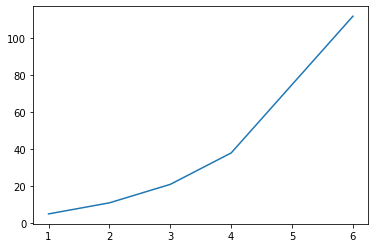

In [35]:
plt.plot([1,2,3,4,6], [5, 11, 21, 38, 112])